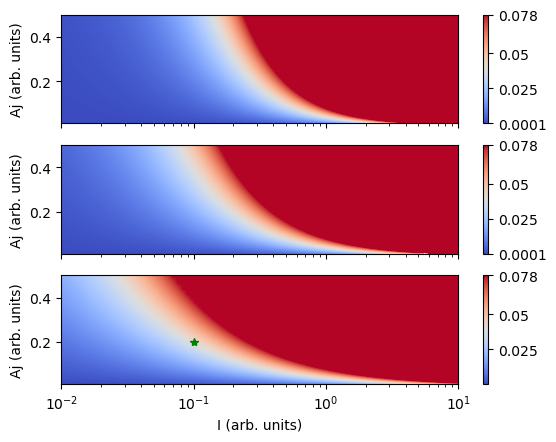

In [40]:
import matplotlib.ticker as tkr

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib import cm, ticker

# parameter scan
Aj = np.linspace(0.01, 0.5, 1500)
I = np.linspace(0.01, 10, 1500)

# thresholds
Ron = 12.9 #kOhm
Gon = 1.0/Ron
Roff = 10000 #kOhm
Goff = 1.0/Roff
    
# meshgrid    
xI, yAj = np.meshgrid(I, Aj)

# conductance alphaj > 1
alphaj = 1.3
conda11 = yAj * xI**alphaj
conda11[conda11 > Gon] = Gon
conda11[conda11 < Goff] = Goff

# conductance alphaj = 1
alphaj = 1.0
conda1 = yAj * xI**alphaj
conda1[conda1 > Gon] = Gon
conda1[conda1 < Goff] = Goff

# conductance alphaj < 1
alphaj = 0.7
conda09 = yAj * xI**alphaj
conda09[conda09 > Gon] = Gon
conda09[conda09 < Goff] = Goff

#plt.figure()
#plt.contourf( xI, yAj, conda1, 1000, cmap='coolwarm')
#plt.gca().set_xscale('log')
#plt.xlabel('I (arb. units)')
#plt.ylabel('Aj (arb. units)')
#plt.colorbar()

# 3 column subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

plot1 = ax1.contourf( xI, yAj, conda11, 1000, cmap='coolwarm')
ax1.set_ylabel('Aj (arb. units)')

plot2 = ax2.contourf( xI, yAj, conda1, 1000, cmap='coolwarm')
ax2.set_ylabel('Aj (arb. units)')

plot3 = ax3.contourf( xI, yAj, conda09, 1000, cmap='coolwarm')
ax3.plot(0.1, 0.2, 'g*')
plt.colorbar(plot1, ax=ax1, ticks=[Goff, 0.025, 0.05, Gon], format=tkr.FormatStrFormatter('%.2g'))
plt.colorbar(plot2, ax=ax2, ticks=[Goff, 0.025, 0.05, Gon], format=tkr.FormatStrFormatter('%.2g'))
plt.colorbar(plot3, ax=ax3, ticks=[Goff, 0.025, 0.05, Gon], format=tkr.FormatStrFormatter('%.2g'))
#fig.colorbar(ax1, orientation='vertical')
#fig.colorbar(ax2, orientation='vertical')
#fig.colorbar(ax3, orientation='vertical')
plt.gca().set_xscale('log')
plt.xlabel('I (arb. units)')
ax3.set_ylabel('Aj (arb. units)')
plt.savefig('fig_power_law_test.png')
#plt.ylabel('Aj (arb. units)')

# Interpolation of the transformed data on a regular new y axis
#xlog_interpolation = interp1d(np.log(I), cond.T)
#new_x = np.linspace(min(np.log(I)), max(np.log(I)), len(I))
#new_cond = xlog_interpolation(new_x).T

#plt.figure()
#plt.pcolormesh(new_x, Aj, new_cond);
#plt.ylabel('Aj (arb. units)'); plt.xlabel('log(I) (arb. units)');
